In [157]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [158]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [159]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [160]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [161]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [162]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7176 non-null   object 
 1   Year            7176 non-null   int64  
 2   GDP_Per_Capita  7176 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 168.3+ KB


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [163]:
years=gdp_df['Country'].value_counts(sort=True, ascending=True)


In [164]:
uni = np.unique(gdp_df['Country'])

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [165]:
graph_gdp = gdp_df[(gdp_df['Year']==2020) & (gdp_df['GDP_Per_Capita'])]

C:\Users\12564\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP_Per_Capita'>

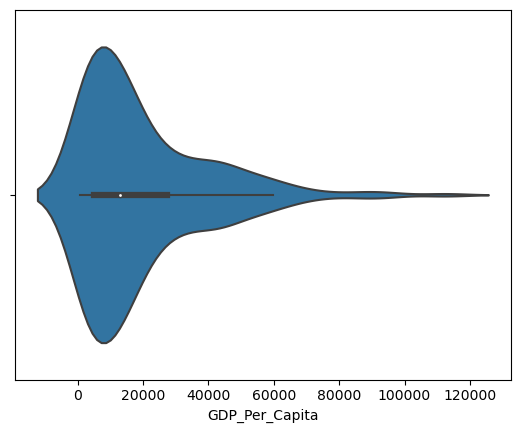

In [166]:
sns.violinplot(graph_gdp['GDP_Per_Capita'])

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

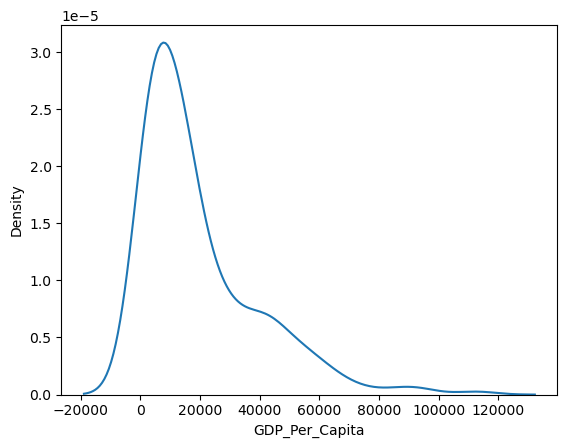

In [167]:
sns.kdeplot(graph_gdp['GDP_Per_Capita'])

C:\Users\12564\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_Per_Capita'>

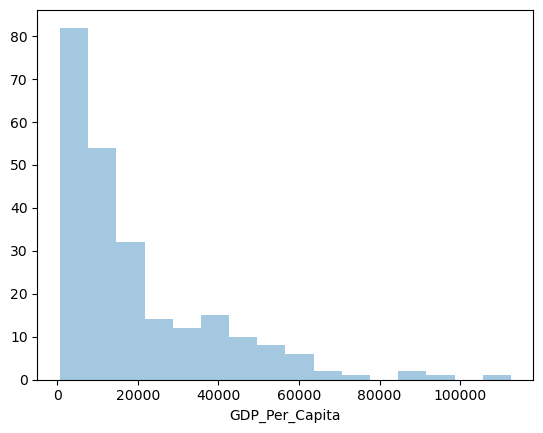

In [168]:
sns.distplot(a=graph_gdp['GDP_Per_Capita'],hist=True,kde=False,rug=False)

C:\Users\12564\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP_Per_Capita'>

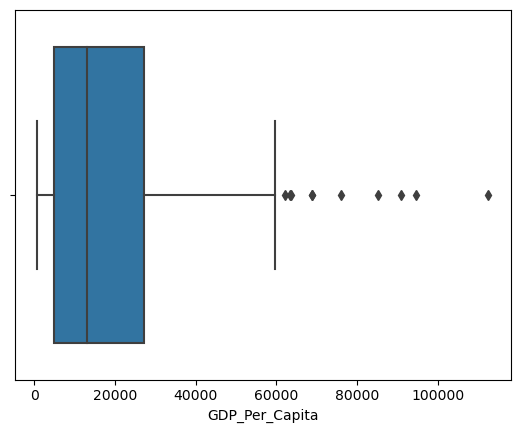

In [169]:
sns.boxplot(graph_gdp['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [170]:
gdp2020= gdp_df[(gdp_df['Year']==2020)]
gdp2020['GDP_Per_Capita'].median()

12908.9374056206

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

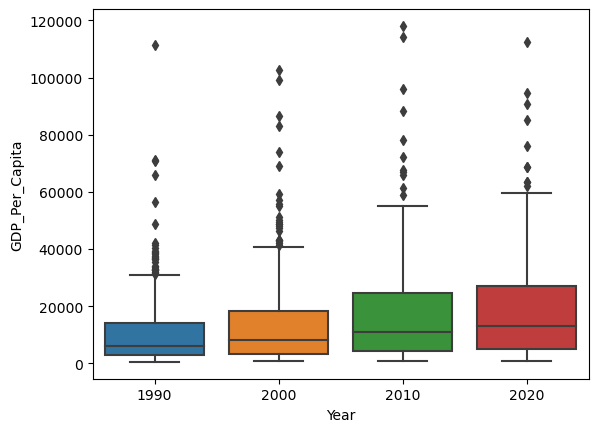

In [171]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]
sns.boxplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

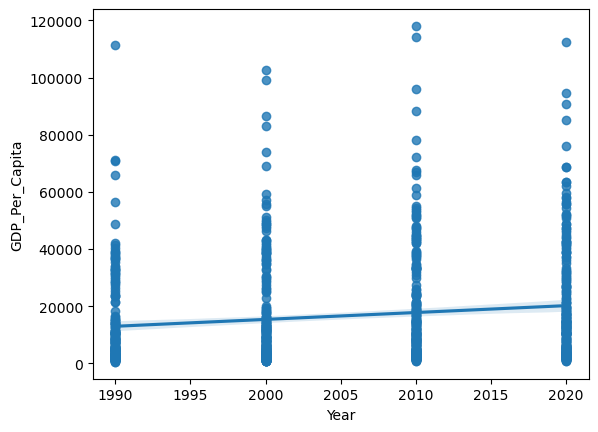

In [172]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<BarContainer object of 918 artists>

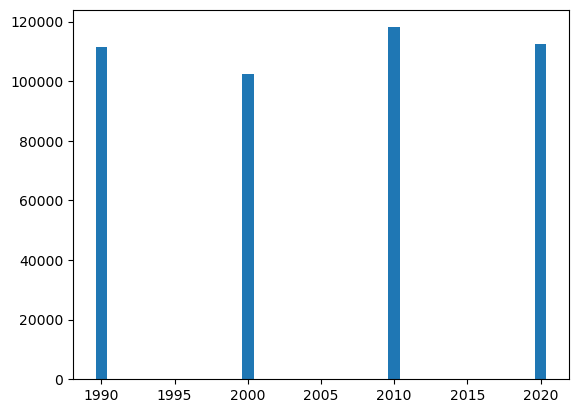

In [173]:
plt.bar(gdp_decades['Year'],gdp_decades['GDP_Per_Capita'])

11. Which country was the first to have a GDP per capita greater than $100,000?

In [174]:
gdp_filtered = gdp_df[gdp_df['GDP_Per_Capita'] >= 100000]
gdp_grouped = gdp_filtered.groupby('Country').agg({'Year': 'min', 'GDP_Per_Capita': 'first'}) 
gdp_grouped = gdp_grouped.reset_index() 
gdp_grouped.columns = ['Country', 'Year', 'GDP_Per_Capita'] 
print(gdp_grouped)

                Country  Year  GDP_Per_Capita
0            Luxembourg  2001   112557.309472
1      Macao SAR, China  2010   127272.548511
2  United Arab Emirates  1990   102494.714624


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Country
Luxembourg    112557.309472
Name: GDP_Per_Capita, dtype: float64


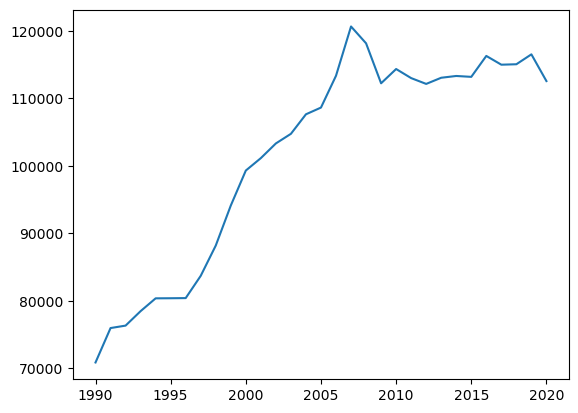

In [175]:
gdp2020=gdp_df[gdp_df['Year']==2020]
max20gdp=gdp2020.groupby('Country')['GDP_Per_Capita'].max().sort_values(ascending=False)
print(max20gdp.head(1))
luxgdp=gdp_df[gdp_df['Country']=='Luxembourg']
plt.plot(luxgdp['Year'],luxgdp['GDP_Per_Capita'])

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

Country
Burundi    731.064074
Name: GDP_Per_Capita, dtype: float64


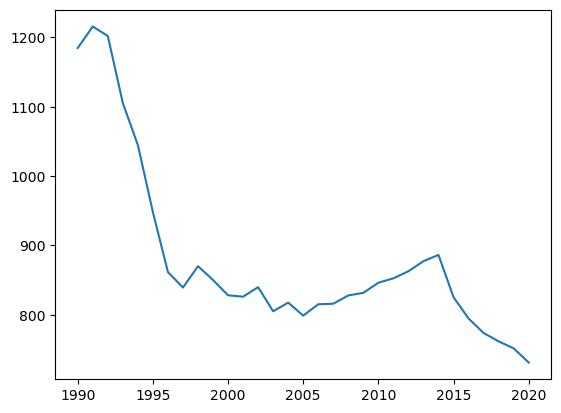

In [176]:
min20gdp=gdp2020.groupby('Country')['GDP_Per_Capita'].min().sort_values(ascending=True)
print(min20gdp.head(1))
bur_gdp=gdp_df[gdp_df['Country']=='Burundi']
plt.plot(bur_gdp['Year'],bur_gdp['GDP_Per_Capita'])

In [177]:
gdp_df[gdp_df['Year']==1990]['GDP_Per_Capita'].mean()

12465.941627925595

In [178]:
gdp_df[gdp_df['Year']==2020]['GDP_Per_Capita'].mean()

19496.88171245749

In [180]:
print(gdp90)

                          Country  Year  GDP_Per_Capita
49    Africa Eastern and Southern  1990     3083.976800
80     Africa Western and Central  1990     2810.341129
111                       Albania  1990     4827.034551
142                       Algeria  1990     8746.340762
173                        Angola  1990     5758.950488
...                           ...   ...             ...
7024                      Vanuatu  1990     2855.554643
7055                      Vietnam  1990     2066.372215
7113                        World  1990     9704.621768
7144                       Zambia  1990     2190.181724
7175                     Zimbabwe  1990     2652.129209

[206 rows x 3 columns]


In [182]:
jgp= gdp_df[gdp_df['Year'].isin([1990,2020])]
print(jgp)

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
49    Africa Eastern and Southern  1990     3083.976800
50     Africa Western and Central  2020     4021.293919
80     Africa Western and Central  1990     2810.341129
...                           ...   ...             ...
7113                        World  1990     9704.621768
7114                       Zambia  2020     3277.816510
7144                       Zambia  1990     2190.181724
7145                     Zimbabwe  2020     2134.555461
7175                     Zimbabwe  1990     2652.129209

[446 rows x 3 columns]
